In [1]:
# importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# Importing the preocessed dataset

In [2]:
current_path = os.getcwd()
data_path = current_path + '/data/processed/'
df = pd.read_csv(data_path + 'data.csv')
df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,datetime,tavg,prcp,wdir,wspd,pres,is_holiday
0,26,1,1,2019-01-01,1,47,2019-01-01 10:00:00,-16.7,0.0,305.0,15.3,1031.2,1
1,26,1,2,2019-01-01,1,5,2019-01-01 10:00:00,-16.7,0.0,305.0,15.3,1031.2,1
2,26,5,1,2019-01-01,1,65,2019-01-01 10:00:00,-16.7,0.0,305.0,15.3,1031.2,1
3,26,5,2,2019-01-01,1,4,2019-01-01 10:00:00,-16.7,0.0,305.0,15.3,1031.2,1
4,30,1,1,2019-01-01,1,31,2019-01-01 10:00:00,-16.7,0.0,305.0,15.3,1031.2,1


In [3]:
df.shape

(21409776, 13)

# Final Data Processing

In [4]:
df.drop(['datetime'], axis=1, inplace=True)
df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,tavg,prcp,wdir,wspd,pres,is_holiday
0,26,1,1,2019-01-01,1,47,-16.7,0.0,305.0,15.3,1031.2,1
1,26,1,2,2019-01-01,1,5,-16.7,0.0,305.0,15.3,1031.2,1
2,26,5,1,2019-01-01,1,65,-16.7,0.0,305.0,15.3,1031.2,1
3,26,5,2,2019-01-01,1,4,-16.7,0.0,305.0,15.3,1031.2,1
4,30,1,1,2019-01-01,1,31,-16.7,0.0,305.0,15.3,1031.2,1


In [5]:
df.dtypes

station_id          int64
dir_of_travel       int64
lane_of_travel      int64
date               object
hour                int64
volume              int64
tavg              float64
prcp              float64
wdir              float64
wspd              float64
pres              float64
is_holiday          int64
dtype: object

In [6]:
df['station_id'].nunique()

155

In [7]:
# Converting data types
df['station_id'] = df['station_id'].astype('category')
df['dir_of_travel'] = df['dir_of_travel'].astype('category')
df['lane_of_travel'] = df['lane_of_travel'].astype('category')
df['date'] = pd.to_datetime(df['date']).dt.date
df.dtypes

station_id        category
dir_of_travel     category
lane_of_travel    category
date                object
hour                 int64
volume               int64
tavg               float64
prcp               float64
wdir               float64
wspd               float64
pres               float64
is_holiday           int64
dtype: object

# Data Analysis

In [8]:
df.describe()

,hour,volume,tavg,prcp,wdir,wspd,pres,is_holiday
count,2.140978e+07,2.140978e+07,2.140978e+07,2.140978e+07,2.140978e+07,2.140978e+07,2.140978e+07,2.140978e+07
mean,1.250000e+01,3.263236e+02,8.418671e+00,1.867545e+00,2.040288e+02,1.663819e+01,1.016330e+03,3.224284e-02
std,6.922187e+00,4.044019e+02,1.238650e+01,5.728782e+00,9.614011e+01,6.836935e+00,7.558313e+00,1.766444e-01
min,1.000000e+00,0.000000e+00,-2.520000e+01,0.000000e+00,0.000000e+00,2.600000e+00,9.925000e+02,0.000000e+00
25%,6.750000e+00,3.400000e+01,-9.000000e-01,0.000000e+00,1.390000e+02,1.170000e+01,1.011300e+03,0.000000e+00
50%,1.250000e+01,1.460000e+02,8.800000e+00,0.000000e+00,2.020000e+02,1.550000e+01,1.015800e+03,0.000000e+00
75%,1.825000e+01,4.790000e+02,1.960000e+01,3.000000e-01,2.920000e+02,2.050000e+01,1.021100e+03,0.000000e+00
max,2.400000e+01,5.196000e+03,3.080000e+01,5.300000e+01,3.590000e+02,4.470000e+01,1.042800e+03,1.000000e+00


## Categorical Variables vs Volume

### Station ID

In [9]:
grouped_station = df.groupby('station_id')['volume'].agg('mean').reset_index().sort_values(by='volume', ascending=False)
grouped_station

/tmp/ipykernel_827/3394828575.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_station = df.groupby('station_id')['volume'].agg('mean').reset_index().sort_values(by='volume', ascending=False)


,station_id,volume
122,10338,865.846709
133,11179,850.587852
127,10800,816.545163
137,11202,814.207620
135,11191,772.249508
...,...,...
80,2685,19.001469
29,209,15.871874
43,232,13.104372
42,231,12.771655


In [10]:
# Taking 3 stations, one with highest volume, one with lowest volume and one with average volume
mask = (grouped_station['volume'] == grouped_station['volume'].max())
station_max = grouped_station[mask]['station_id'].values[0]
mask = (grouped_station['volume'] == grouped_station['volume'].min())
station_min = grouped_station[mask]['station_id'].values[0]
mask = (grouped_station['volume'] == grouped_station['volume'].median())
station_median = grouped_station[mask]['station_id'].values[0]
station_max, station_min, station_median

(10338, 214, 9556)

In [11]:
mask = df['station_id'].isin([station_max, station_min, station_median])
station_df = df[mask]
station_df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,tavg,prcp,wdir,wspd,pres,is_holiday
72,214,1,1,2019-01-01,1,2,-16.70,0.0,305.0,15.3,1031.20,1
73,214,5,1,2019-01-01,1,0,-16.70,0.0,305.0,15.3,1031.20,1
221,214,1,1,2019-01-02,1,2,-9.50,0.0,207.0,17.6,1017.70,0
222,214,5,1,2019-01-02,1,1,-9.50,0.0,207.0,17.6,1017.70,0
380,214,1,1,2019-01-03,1,1,-3.85,0.0,223.0,13.8,1013.15,0


In [12]:
station_df['station_id'] = station_df['station_id'].astype('object')
station_df['station_id'].value_counts()

/tmp/ipykernel_827/1630838008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['station_id'] = station_df['station_id'].astype('object')


station_id
10338    93600
214      87648
9556     52560
Name: count, dtype: int64

In [13]:
station_df.dtypes

station_id          object
dir_of_travel     category
lane_of_travel    category
date                object
hour                 int64
volume               int64
tavg               float64
prcp               float64
wdir               float64
wspd               float64
pres               float64
is_holiday           int64
dtype: object

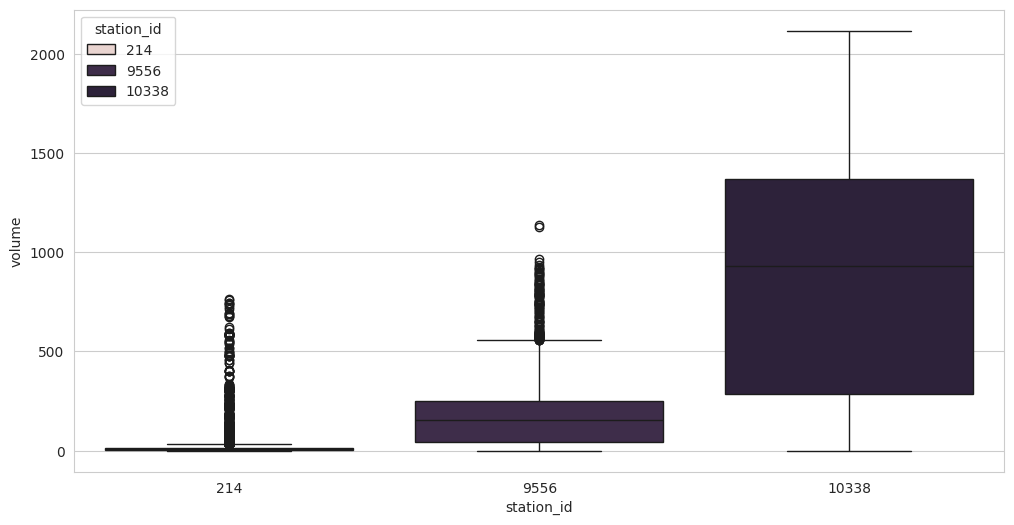

In [14]:
# Now plotting the distribution of volume for these 3 stations
plt.figure(figsize=(12, 6))
sns.boxplot(data=station_df, y='volume', x='station_id', hue='station_id')
plt.show()

Seems that the stations have different volumes, thus each road has different traffic. This is a good feature to predict the traffic.

### Direction of Travel

In [15]:
df.dtypes

station_id        category
dir_of_travel     category
lane_of_travel    category
date                object
hour                 int64
volume               int64
tavg               float64
prcp               float64
wdir               float64
wspd               float64
pres               float64
is_holiday           int64
dtype: object

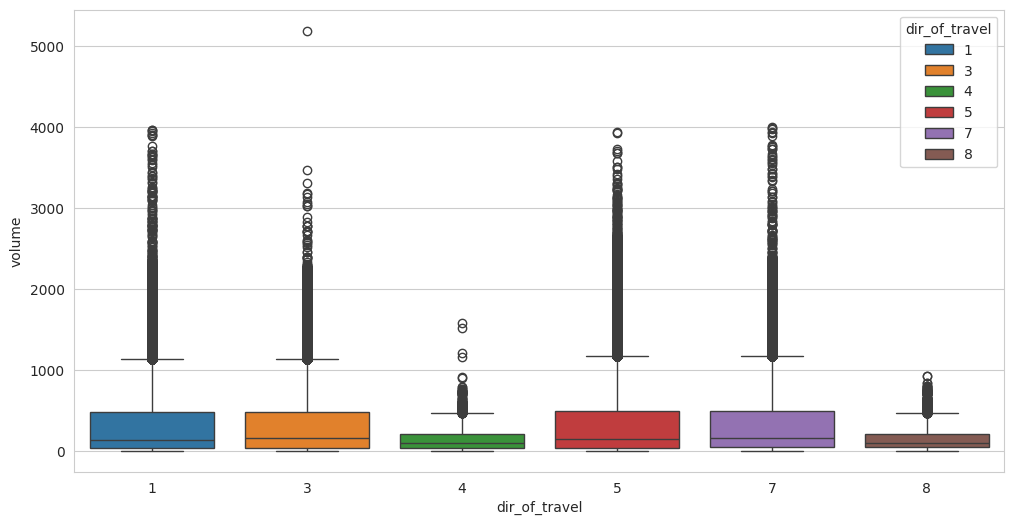

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='dir_of_travel', hue='dir_of_travel')
plt.show()

Seems the direction affect the traffic volume a bit. This is a good feature to predict the traffic. As for 4 and 8 don't have as much traffic volume compared to the other 4 directions

### Lane of Travel

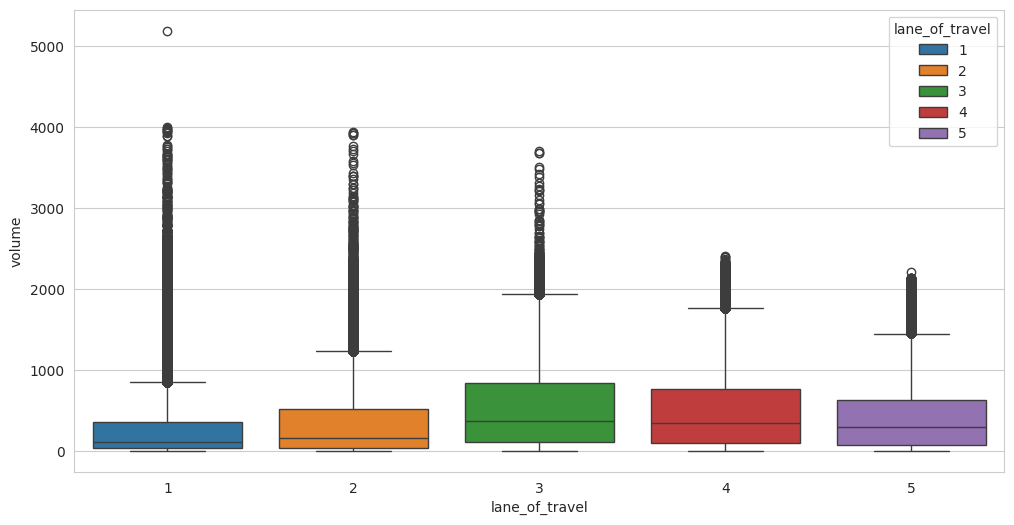

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='lane_of_travel', hue='lane_of_travel')
plt.show()

Seems the lane of travel also affects the traffic volume. This is a good feature to predict the traffic. For example, lane 3 seems to have more consistent high traffic volume but lane 1 has the highest traffic volume recorded

### Is Holiday

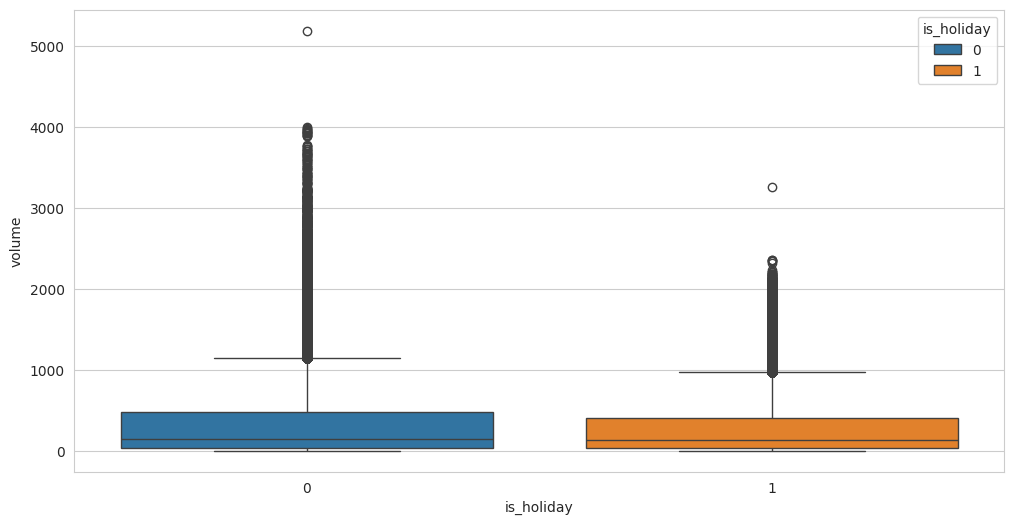

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='is_holiday', hue='is_holiday')
plt.show()

Eventhough both seem to have same distribution, but the traffic seems to be higher on non-holidays. This is a good feature to predict the traffic

## Numerical Variables vs Volume

In [19]:
# Extracting the days, months and years
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df.dtypes

station_id        category
dir_of_travel     category
lane_of_travel    category
date                object
hour                 int64
volume               int64
tavg               float64
prcp               float64
wdir               float64
wspd               float64
pres               float64
is_holiday           int64
day_of_week          int32
month                int32
year                 int32
dtype: object

In [20]:
num_cols = list(df.select_dtypes(include=['int', 'float']).columns)
num_cols

['hour',
 'volume',
 'tavg',
 'prcp',
 'wdir',
 'wspd',
 'pres',
 'is_holiday',
 'day_of_week',
 'month',
 'year']

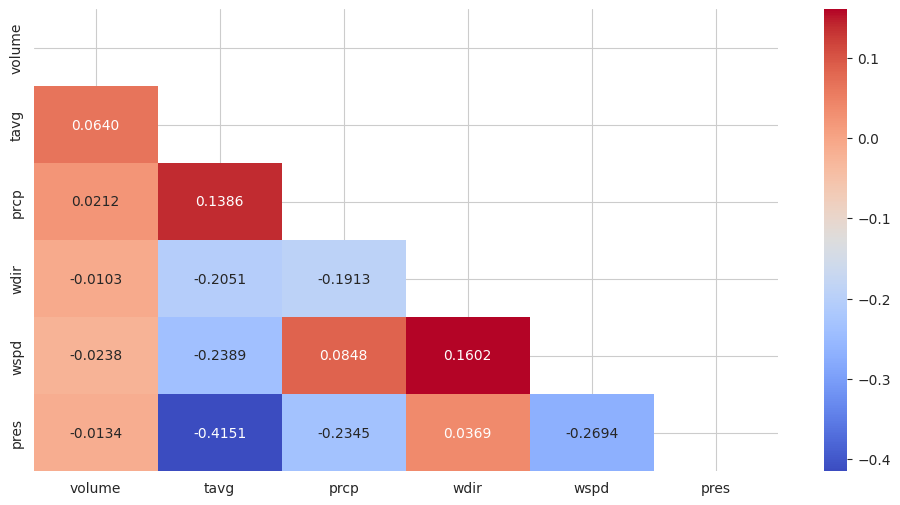

In [21]:
num_cols.remove('is_holiday')
num_cols.remove('hour')
num_cols.remove('day_of_week')
num_cols.remove('month')
num_cols.remove('year')

corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".4f", cmap='coolwarm')
plt.show()

The correlation seem low, however there needs to be further analysis to see the relationship between the numerical variables and the volume

## Time vs Volume

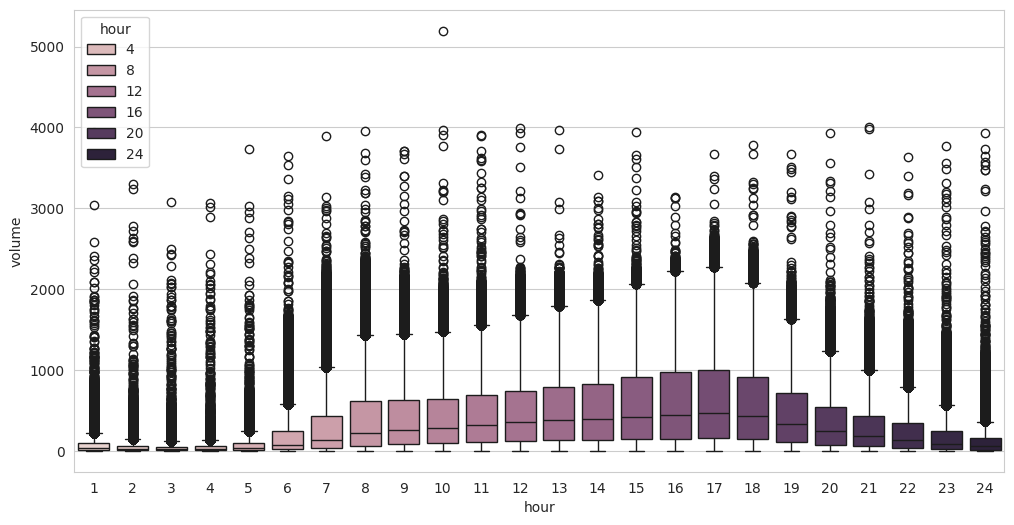

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='hour', hue='hour')
plt.show()

In [23]:
df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,tavg,prcp,wdir,wspd,pres,is_holiday,day_of_week,month,year
0,26,1,1,2019-01-01,1,47,-16.7,0.0,305.0,15.3,1031.2,1,1,1,2019
1,26,1,2,2019-01-01,1,5,-16.7,0.0,305.0,15.3,1031.2,1,1,1,2019
2,26,5,1,2019-01-01,1,65,-16.7,0.0,305.0,15.3,1031.2,1,1,1,2019
3,26,5,2,2019-01-01,1,4,-16.7,0.0,305.0,15.3,1031.2,1,1,1,2019
4,30,1,1,2019-01-01,1,31,-16.7,0.0,305.0,15.3,1031.2,1,1,1,2019


/home/linux_user/anaconda3/envs/gpu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


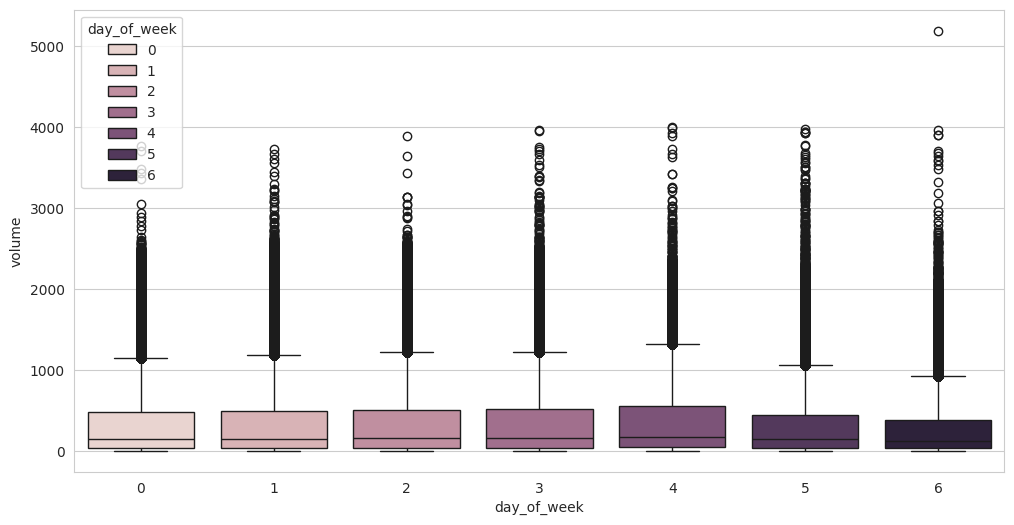

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='day_of_week', hue='day_of_week')
plt.show()

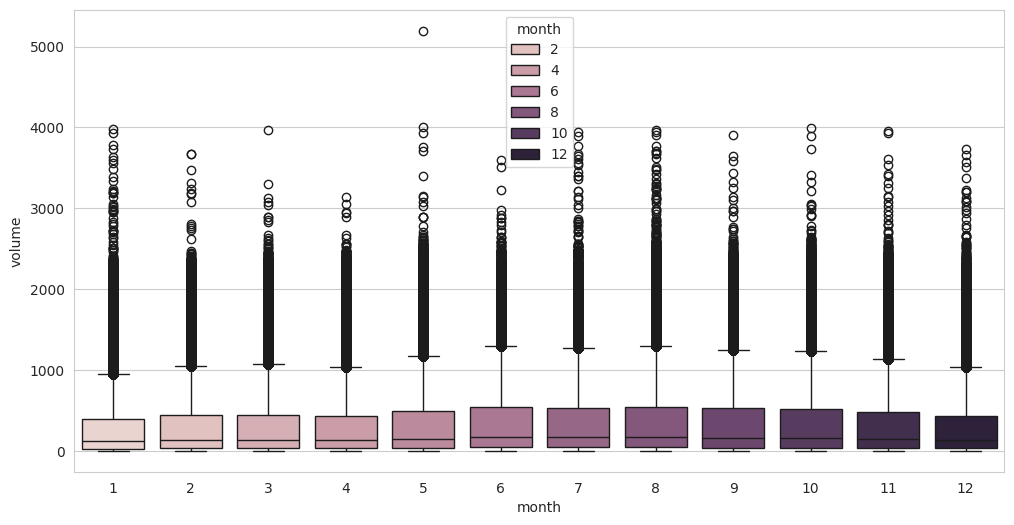

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='month', hue='month')
plt.show()

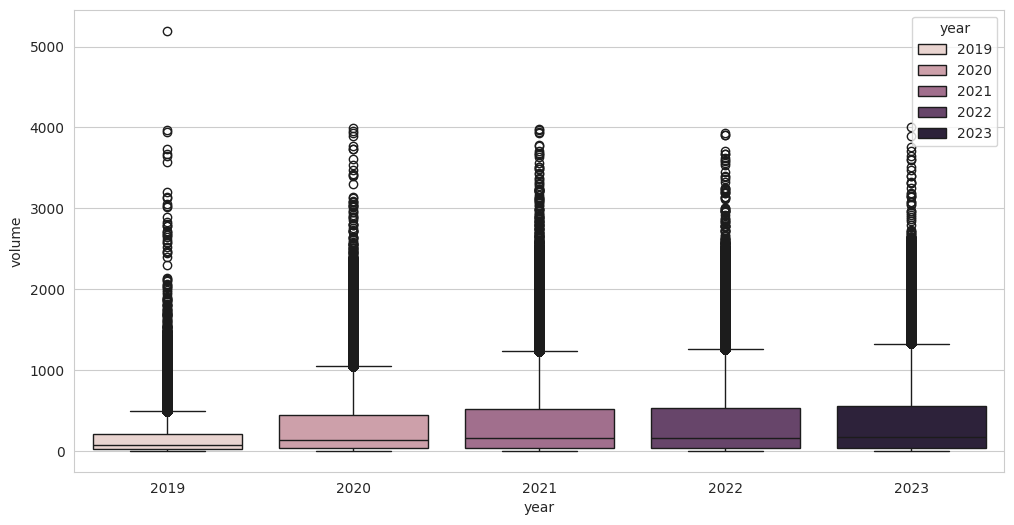

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='volume', x='year', hue='year')
plt.show()